#**Module 1 Challenge - Loan Acceptance Prediction**

##**Objective**:

In this challenge, we will explore a Loan dataset, go through
the steps of the Data Science Lifecycle, and finally be able to
build a simple machine learning model that predicts whether
a person’s loan will be accepted or rejected based on his/her
features.

##**Dataset Description:**

- Loan_ID: data set unique ID

- Gender: individual gender

- Married: individual marital status
- Dependents: number of dependents
- Education: individual education status
- Self_Employed: individual employment status

- ApplicantIncome: individual income

- CoapplicantIncome: individual Co Applicant income

- LoanAmount: Loan amount in thousands

- Loan_Amount_Term: term of loan in months

- Credit_History: credit history meets guidelines

- Property_Area: Urban/ Semi Urban/ Rural

- Loan_Status: loan approved (Y/N) - TARGET

## **Understanding the Problem**

The task here is to predict whether a loan will be approved (Loan_Status = Yes/No).

So, it's a Binary classification task.

We will use Logistic Regression for that purpose.


##**Assumptions/Insights to Include**:

Credit history and applicant income likely have a strong influence on loan approval.


The property area may influence decisions based on urban vs. semiurban vs. rural economic conditions.

# 1. Data Loading

#### Import necessary python modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Load and Read the data

We have the data stored in csv (Comma Separated Values) files. We have 2 files, one for training and the other for testing.

We need to combine them into one dataset and at the end when training the model, we will split it into training and testing.

We need to get and load our dataset by using the read_csv function of the pandas library.

In [ ]:
#load both datasets
train_df = pd.read_csv('train - train.csv')
test_df = pd.read_csv('test - test.csv')

#tag source before combining
train_df['source'] = 'train'
test_df['source'] = 'test'

#merge both datasets for consistent preprocessing
df = pd.concat([train_df, test_df], ignore_index=True)

Let's look inside the data

In [ ]:
#print first 5 rows
print('First 5 rows')
print(df.head())

First 5 rows
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status source  
0             1.0         Urban           Y  train  
1             1.0         Rural        

In [ ]:
#print first 10 rows
print('First 10 rows')
print(df.head(10))

First 10 rows
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2            

In [ ]:
#print last 5 rows
print('Last 5 rows')
print(df.tail())

Last 5 rows
      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status source  
609             1.0         Rural           Y   test  
610             1.0         Ru

## 2. Exploratory Data Analysis (EDA)


Let's dig deeper & understand our data

####Let's check how many rows and columns we have in our dataset

In [ ]:
#get the number of rows and columns
rows = df.shape[0]
columns = df.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 614 rows and 14 columns.


Now Let's use the info() function to check:

The data types we have, if we have missing values, memory usage, and the number of rows and columns.

In [ ]:
print('Data info')
print(df.info())

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB
None


So as total we have 614 rows and 14 columns, including both categorical and numerical variables.

We have missing values in the columns: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History.

These missing values will be addressed in the cleaning phase before moving to analysis or modeling.

Another thing we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column ) using the describe() function.

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The minimum value, maximum value, mean, standard deviation, 25th percentile, median or 50th percentile and 75th percentile of each of the numerical columns are shown here. The other columns like Gender, married, education, self_employed, property area, loan status, and dependents need to be encoded for the model to understand what we're doing.

###Check for Duplicate Rows

In [ ]:
#Check for duplicate rows
print("Duplicate rows before removal:", df.duplicated().sum())

Duplicate rows before removal: 0


There is no duplicate rows in this dataset which is great. Every row is unique. So no data removal is required for duplication at this stage.

###Check for Outliers

In [ ]:
#Detect Outliers using IQR
#define numeric columns to check
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

#Dictionary for outlier counts
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    #Count outliers
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

#Print the outliers per column
print("Outlier count per column (before removal):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier count per column (before removal):
ApplicantIncome: 50
CoapplicantIncome: 18
LoanAmount: 39


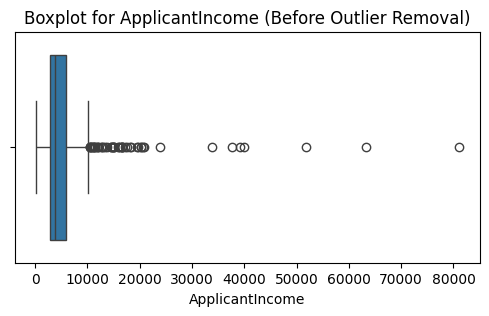

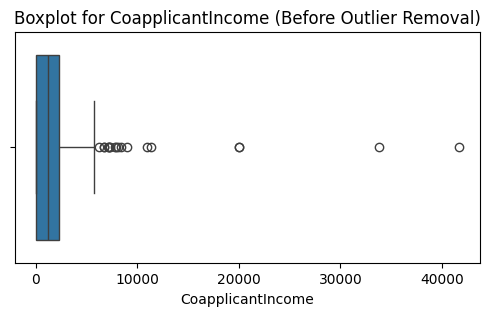

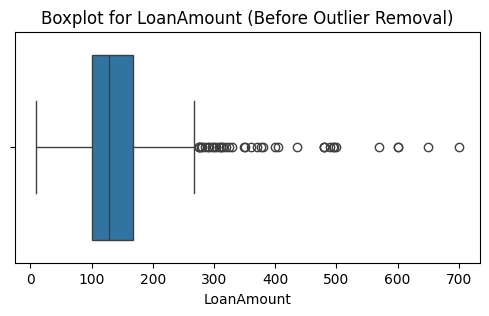

In [ ]:
#Boxplot to visualize outliers
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (Before Outlier Removal)')
    plt.show()

The boxplots for ApplicantIncome, CoapplicantIncome, and LoanAmount reveal that there are significant outliers in all these numerical features.

1- In ApplicantIncome, a few values are > 80,000, while the majority of applicants earn < 20,000.

2- CoapplicantIncome also contains visible outliers, with some incomes > 40,000.

3- LoanAmount shows extreme values > 500, even though most loans fall below 200.

So we need to remove these outliers because they will skew model performance especially in models sensitive to scale and variance like the one we are going to use which is logistic regression.

In [ ]:
#remove the outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Outliers removed.")

Outliers removed.


In [ ]:
print("Remaining rows after outlier removal:", df.shape[0]) #double check

Remaining rows after outlier removal: 502


So all is good now. Outliers are successfully removed.

###Check missing values per column

In [ ]:
print('missing values per column')
print(df.isnull().sum())

missing values per column
Loan_ID               0
Gender                9
Married               2
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       40
Property_Area         0
Loan_Status           0
source                0
dtype: int64


We have missing values in the columns: Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, and Credit_History.

# 3. Data Exploration and Preparation

## Cleaning the data

###Handling missing values

Several categorical features in the dataset contain missing values.

So we need to handle these missing values, as many machine learning models can't work with incomplete data and may be biased by how missing values are distributed.

In [ ]:
#Filling missing values with mode
#gender, married, dependents, self_employed are categorical variables we can fill their missing values with mode
#Loan_Amount_Term and Credit_History are numerical but Loan_Amount_Term is discrete and Credit_History is binary so we can fill
#their missing values with mode

# Fill categorical missing values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
print(df.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       40
Property_Area         0
Loan_Status           0
source                0
dtype: int64


<ipython-input-15-0561282fdce5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-15-0561282fdce5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
#Fill Loan_Amount_Term and Credit_History with mode (are kind of categorial also not numerical)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
source               0
dtype: int64


<ipython-input-16-aee30f16cbae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
<ipython-input-16-aee30f16cbae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
print(df.isnull().sum()) #check if all missing values are filled now

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
source               0
dtype: int64


Now, we're okay. There is no more missing values.

###Encoding Binary Categorical Variables

In [ ]:
#convert the Loan_Status column from Y / N to numerical format 1 / 0 similarly for the other columns
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
df['Property_Area'] = df['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
print(df)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
6    LP001013       1        1          0          0              0   
..        ...     ...      ...        ...        ...            ...   
608  LP002974       1        1          0          1              0   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1         3+          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

###One-Hot Encoding for Multi-Category Features

In [ ]:
#for dependents feature - will use one-hot encoding since it has 0,1,2,3+ so 4 categories so better to use one-hot encoding in this case
df = pd.get_dummies(df, columns=['Dependents'], prefix='Dep', drop_first=True)
print(df)

      Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
1    LP001003       1        1          1              0             4583   
2    LP001005       1        1          1              1             3000   
3    LP001006       1        1          0              0             2583   
4    LP001008       1        0          1              0             6000   
6    LP001013       1        1          0              0             2333   
..        ...     ...      ...        ...            ...              ...   
608  LP002974       1        1          1              0             3232   
609  LP002978       0        0          1              0             2900   
610  LP002979       1        1          1              0             4106   
612  LP002984       1        1          1              0             7583   
613  LP002990       0        0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1  

Binary categorical features such as Loan_Status, Gender, and Married were encoded using manual mapping with the map() function.

The Dependents feature, which includes 4 different categories (0, 1, 2, 3+), was encoded using one-hot encoding to preserve category independence without assuming any order.

# 4. Create new features

We can create a new feature which is:

**Total Income**

Total Income = ApplicantIncome + CoapplicantIncome

Lenders assess total family income, not just the applicant’s income. This feature strongly correlates with loan repayment ability.

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
print(df.head())

    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
1  LP001003       1        1          1              0             4583   
2  LP001005       1        1          1              1             3000   
3  LP001006       1        1          0              0             2583   
4  LP001008       1        0          1              0             6000   
6  LP001013       1        1          0              0             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
6             1516.0        95.0             360.0             1.0   

   Property_Area  Loan_Status source  Dep_1  Dep_2  Dep_3+  Total_Income  
1              0            0  train   True  False   

 Also we will create:

  **EMI** **(Estimated Monthly Installment)**


 EMI directly impacts affordability, high EMI relative to income may lead to loan rejection.

In [ ]:
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [ ]:
print(df.head())

    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
1  LP001003       1        1          1              0             4583   
2  LP001005       1        1          1              1             3000   
3  LP001006       1        1          0              0             2583   
4  LP001008       1        0          1              0             6000   
6  LP001013       1        1          0              0             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
6             1516.0        95.0             360.0             1.0   

   Property_Area  Loan_Status source  Dep_1  Dep_2  Dep_3+  Total_Income  \
1              0            0  train   True  False  

We will also create the variable:

**Loan to Income Ratio**

This ratio helps assess risk. A higher ratio = more financial burden = less chance of approval.

In [ ]:
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

In [ ]:
print(df.head())

    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
1  LP001003       1        1          1              0             4583   
2  LP001005       1        1          1              1             3000   
3  LP001006       1        1          0              0             2583   
4  LP001008       1        0          1              0             6000   
6  LP001013       1        1          0              0             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
6             1516.0        95.0             360.0             1.0   

   Property_Area  Loan_Status source  Dep_1  Dep_2  Dep_3+  Total_Income  \
1              0            0  train   True  False  

 ## 5. Data Exploration - Some Visualizations

In [ ]:
#import needed libraries
import seaborn as sns
import matplotlib.pyplot as plt

**Loan Status Count**

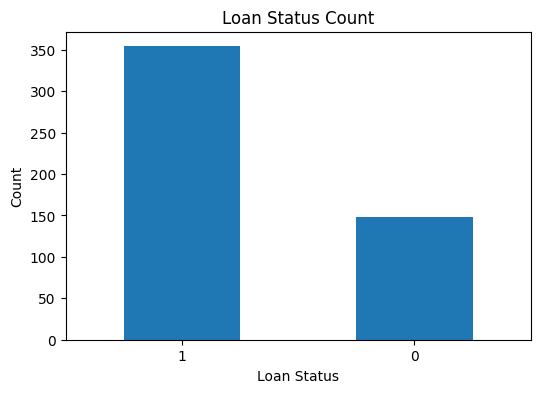

In [ ]:
#Loan Status Count - Bar chart
plt.figure(figsize=(6, 4))
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
plt.show()

The bar graph shows clearly that a large number of applicants (approximately 350) had their loans approaved compared to those whose loans were rejected (approximately 150).

This indicates a class imbalance in the target variable, which may need to be considered during model training and evaluation.

**Loan Status by Credit History**

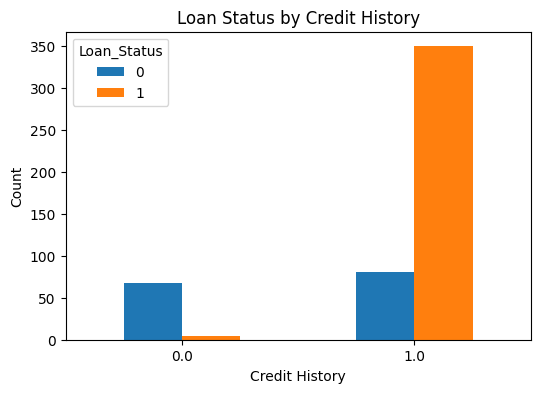

In [ ]:
#Loan Status by Credit History - Grouped bar chart
credit_loan = pd.crosstab(df['Credit_History'], df['Loan_Status'])
credit_loan.plot(kind='bar', figsize=(6, 4))
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
plt.show()

A clear pattern is observed here:

Applicants with a credit history have a much higher rate of loan acceptance compared to those without a credit history.

So, applicants with no credit history are more likely to be denied.

This shows that Credit History is a strong predictor of loan approval and suggests that it plays a significant role in the model's performance.

**Loan Status by Property Area**

<Figure size 600x400 with 0 Axes>

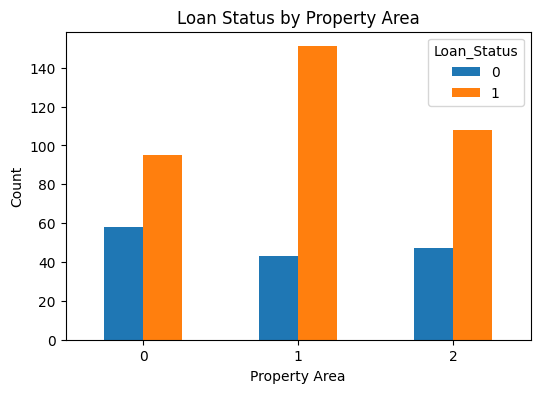

In [ ]:
#Loan status by property area - Grouped Bar chart
plt.figure(figsize=(6, 4))
property_loan = pd.crosstab(df['Property_Area'], df['Loan_Status'])
property_loan.plot(kind='bar', figsize=(6, 4))
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
plt.show()

The chart shows that semiurban areas have the highest loan approval rate followed by urban areas.

Rural applicants have the lowest number of approvals and loans may be rejected in this case.

This suggests that property area may influence loan approval decisions, with semiurban areas showing a best choice.

**Loan Amount Distribution**

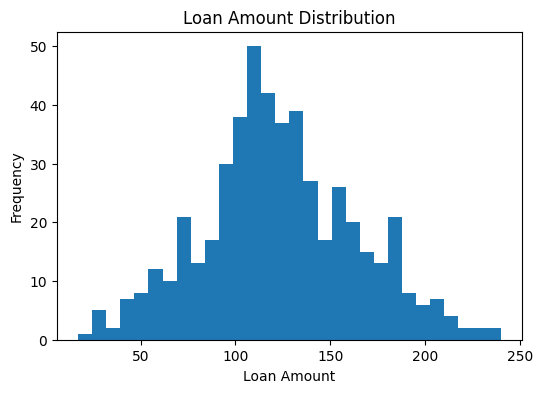

In [ ]:
#Loan amount distribution - Histogran
plt.figure(figsize=(6, 4))
df['LoanAmount'].plot(kind='hist', bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

The distribution of loan amounts is approximately bell-shaped and slightly right-skewed, with most loan amounts ranging between 80 and 150.

This indicates that the majority of applicants request moderate loan amounts, while a smaller number request significantly higher amounts.

**Applicant Income vs. Loan Status**

<Figure size 600x400 with 0 Axes>

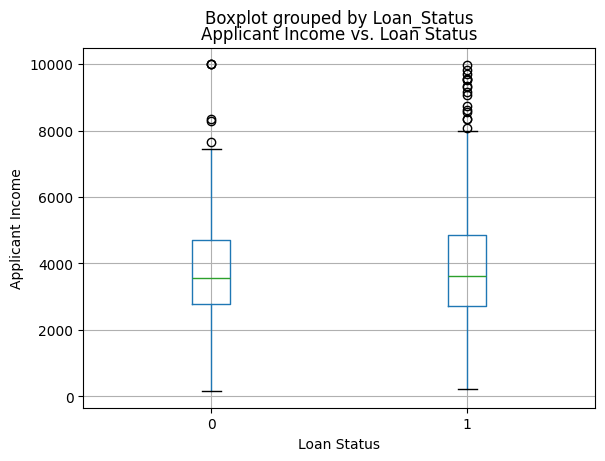

In [ ]:
#Applicant income vs. Loan Status Boxplot
plt.figure(figsize=(6, 4))
df.boxplot(column='ApplicantIncome', by='Loan_Status')
plt.title('Applicant Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

The boxplot shows that the median applicant income is similar for both approved and rejected loans.
While both groups contain outliers with very high incomes, loan approval doesn't appear to be strongly influenced by applicant income alone.

This suggests that income, while relevant, may not be a decisive factor in loan approval without considering other variables like credit history or coapplicant income.

**Credit History vs. Loan Status**

<Figure size 600x400 with 0 Axes>

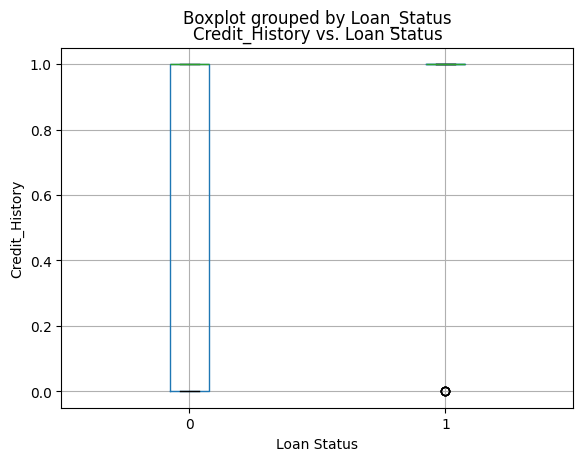

In [ ]:
#Credit history vs. loan status - boxplot
plt.figure(figsize=(6, 4))
df.boxplot(column='Credit_History', by='Loan_Status')
plt.title('Credit_History vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit_History')
plt.show()

The boxplot shows a strong relationship between Credit_History and Loan_Status.
Most applicants with a credit history were approved, while those with no credit history were largely rejected.

This reinforces that credit history is a key factor in determining loan approval and is likely one of the most important predictive features in the dataset.

**Coapplicant Income vs. Loan Status**

<Figure size 600x400 with 0 Axes>

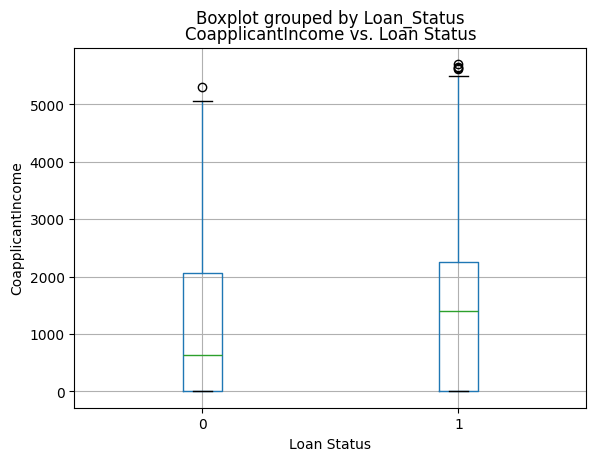

In [ ]:
#Coapplicant income vs. loan status - boxplot
plt.figure(figsize=(6, 4))
df.boxplot(column='CoapplicantIncome', by='Loan_Status')
plt.title('CoapplicantIncome vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CoapplicantIncome')
plt.show()

The boxplot shows that the distribution of coapplicant income is fairly similar for both approved and rejected applicants.

While approved loans tend to have a slightly higher median coapplicant income, the difference is not significant.

This suggests that coapplicant income alone doesn't strongly influence loan approval, but may still be useful when combined with other variables like total income or credit history.

**Applicant Total_Income vs. Loan Status**

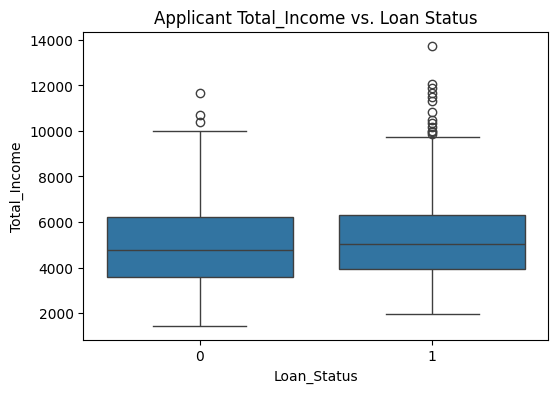

In [ ]:
#boxplot- the new variable Total_Income that we created vs. Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x= 'Loan_Status', y= 'Total_Income', data = df)
plt.title('Applicant Total_Income vs. Loan Status')
plt.show()

The boxplot shows that applicants with approved loans have a slightly higher median total income compared to those whose loans were rejected.

However, the overlap between the 2 groups is significant, indicating that Total Income alone doesn't strongly differentiate approval outcome.
This suggests that while total income may play a role, it likely interacts with other factors such as EMI, credit history, or loan amount in influencing approval decisions.

**Applicant EMI vs. Loan Status**

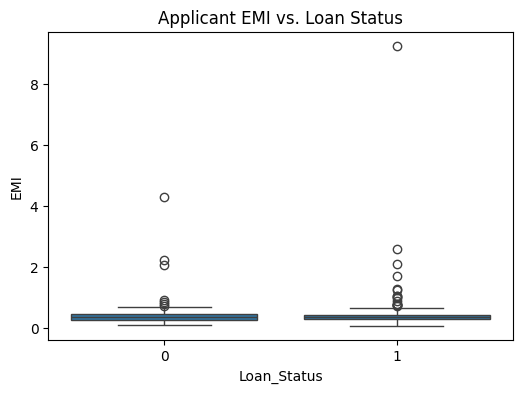

In [ ]:
#boxplot- the new variable EMI that we created vs. Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x= 'Loan_Status', y= 'EMI', data = df)
plt.title('Applicant EMI vs. Loan Status')
plt.show()

The boxplot indicates that most applicants have low EMI values, and the distribution is quite similar across both loan statuses.

While there are a few outliers with high EMI values, the median EMI is nearly identical between approved and rejected loans.

This suggests that EMI alone may not be a strong predictor of loan approval when considered independently.

**Applicant Loan_Income_Ratio vs. Loan Status**

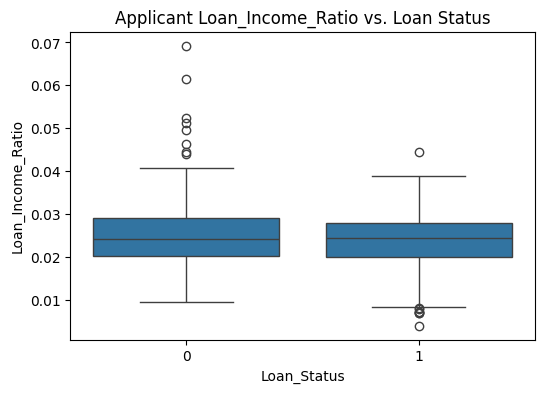

In [ ]:
#boxplot- the new variable Loan_Income_Ratio that we created vs. Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x= 'Loan_Status', y= 'Loan_Income_Ratio', data = df)
plt.title('Applicant Loan_Income_Ratio vs. Loan Status')
plt.show()

The boxplot shows that the Loan-to-Income ratio is slightly lower for applicants whose loans were approved compared to those who were rejected.

This suggests that applicants requesting smaller loans relative to their income are more likely to be approved.

The Loan_Income_Ratio appears to be a potentially useful feature, as it reflects a measure of affordability from the lender's perspective.

**Education vs. Loan Status**

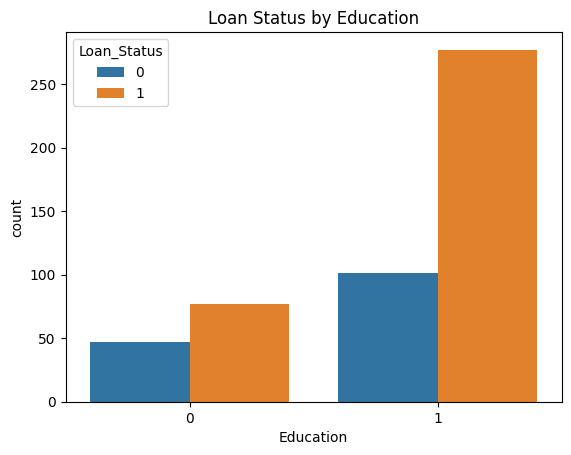

In [ ]:
#education vs. loan status
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Loan Status by Education")
plt.show()

The countplot shows that graduates have a higher number of approved loans compared to non-graduates.

However, the approval-to-rejection ratio is fairly similar across both education groups, suggesting that education level doesn't strongly influence the loan approval outcome on its own.

**Self_Employed vs. Loan Status**

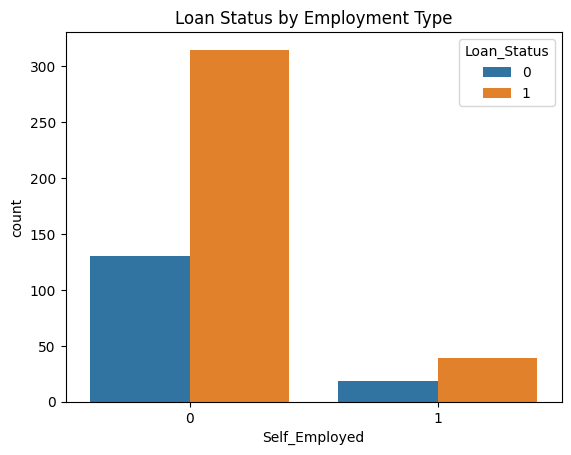

In [ ]:
#self employed vs. loan status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title("Loan Status by Employment Type")
plt.show()

The chart shows that non self-employed applicants make up the majority of approved loans, while self-employed applicants have significantly fewer approvals and rejections.

However, the ratio of approvals to rejections appears similar in both groups, suggesting that employment type has minimal effect on loan approval decisions in this dataset.

## 6. Prepare the data for Modeling

In [ ]:
#Split back into training and test sets
df_train = df[df['source'] == 'train'].drop(columns=['source'])
df_test = df[df['source'] == 'test'].drop(columns=['source'])

In [ ]:
#define features and target
#Drop Loan_ID not necessary column and it has no predictive power
X = df_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = df_train['Loan_Status']  # Already encoded: Y=1, N=0 and it's our target variable, so it must be removed from the features

# Train the model

**Model Building**

In [ ]:
#Logistic Regression
#import needed libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## 7. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled) #make predictions
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))
#evaluate the model
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

Accuracy =  0.7764705882352941
confusion matrix:
 [[12 16]
 [ 3 54]]
classification report:
               precision    recall  f1-score   support

           0       0.80      0.43      0.56        28
           1       0.77      0.95      0.85        57

    accuracy                           0.78        85
   macro avg       0.79      0.69      0.70        85
weighted avg       0.78      0.78      0.75        85



The logistic regression model achieved an accuracy of 77.6%, with strong performance in predicting approved loans (class 1), showing a recall of 0.95 and precision of 0.77.

However, its performance on rejected loans (class 0) is weaker, with a recall of 0.43 and precision of 0.80, indicating that many rejected cases are misclassified.

As suggestions for improvement and to enhance balance:

We can use class weights in logistic regression, try other models like Random Forest or XGBoost, or apply SMOTE or other resampling techniques to address class imbalance.

### Prepare test data and make predictions

In [ ]:
#Prepare final test set (excluding ID and target)
X_final_test = df_test.drop(columns=['Loan_ID', 'Loan_Status'])

#Scale test data using the same scaler used on training data
X_final_test_scaled = scaler.transform(X_final_test)

#Predict using trained model
test_predictions = model.predict(X_final_test_scaled)

#### Create a results DataFrame

In [ ]:
#Combine Loan_IDs with predictions
results_df = pd.DataFrame({
    'Loan_ID': df_test['Loan_ID'],
    'Predicted_Loan_Status': test_predictions
})

In [ ]:
results_df['Predicted_Loan_Status'] = results_df['Predicted_Loan_Status'].map({1: 'Y', 0: 'N'})

In [ ]:
#Save the results to a CSV file
results_df.to_csv('loan_predictions.csv', index=False)
print("Predictions saved to 'loan_predictions.csv'")

Predictions saved to 'loan_predictions.csv'


## 8. Feature Importance

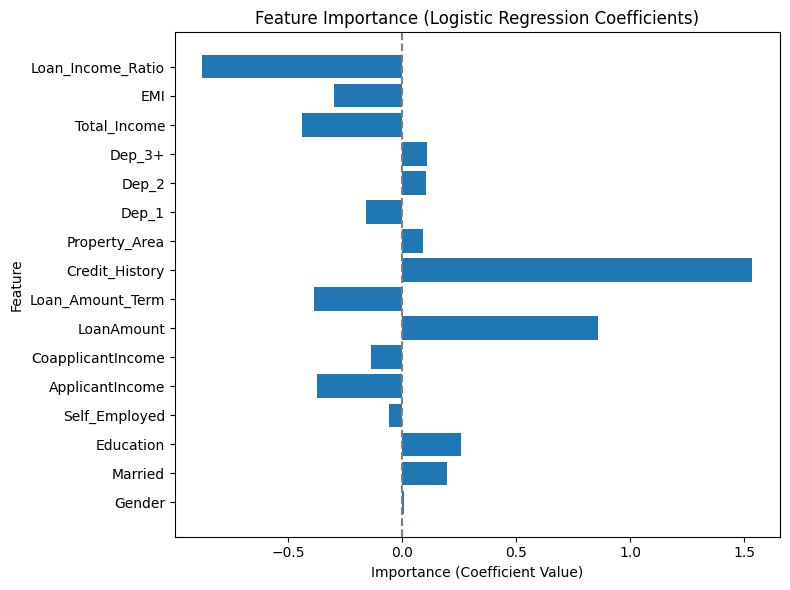

In [ ]:
columns_names = X.columns
features_importance = model.coef_[0]
#Plot
plt.figure(figsize=(8, 6))
plt.barh(columns_names, features_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Importance (Coefficient Value)')
plt.ylabel('Feature')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

The feature importance plot based on logistic regression coefficients confirms and asserts the insights gained from the exploratory data analysis (EDA).

Credit_History stands out as the most influential predictor, aligning with earlier visualizations that showed a strong relationship between credit history and loan approval.

Features like LoanAmount, Loan_Amount_Term, and Total_Income also show meaningful impact, consistent with the trends observed in boxplots.

The Loan_Income_Ratio has a notable negative coefficient, supporting its value as an engineered feature.

In contrast, variables such as Gender, Married, and Self_Employed have minimal influence, which aligns with the weak or neutral trends seen during visual exploration.

In summary, this feature importance analysis validates the EDA findings and supports the selection of key variables for predictive modeling.

##Additional trial
Since we had imbalanced data at the beginning where we saw that the model is biased towards Loan_status = 1 (accepted) even if we try df_train data only not the combined dataset, the training set is biased toward the 1 or Yes (approaval)

I tried to check model = LogisticRegression(max_iter=1000, class_weight='balanced') if it works better

In [ ]:
print(df_train['Loan_Status'].value_counts(normalize=True))

Loan_Status
1    0.706856
0    0.293144
Name: proportion, dtype: float64


The training set alone is imbalanced.

In [ ]:
#Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled) #make predictions
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))
#evaluate the model
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

Accuracy =  0.7294117647058823
confusion matrix:
 [[13 15]
 [ 8 49]]
classification report:
               precision    recall  f1-score   support

           0       0.62      0.46      0.53        28
           1       0.77      0.86      0.81        57

    accuracy                           0.73        85
   macro avg       0.69      0.66      0.67        85
weighted avg       0.72      0.73      0.72        85



The result was: Applying class_weight='balanced' helped improve recall for the minority class (Loan Denied) recall became 0.46,

Allowing the model to identify more true rejections. However, this came at the cost of precision (it decreases to 0.62), leading to more false rejections also accuracy decreased to 72.94%.

Depending on the business context whether precision or recall is more critical, this tradeoff can guide model choice.

But for now, I will keep the model as it without using the class_weight = 'balanced' because the accuracy was better.

At the end, using Random Forest or another model maybe a better option for improvements